# Imports

In [1]:
import numpy as  np
import matplotlib.pyplot as plt
%matplotlib inline

# StreetLight Problem
The problem is that in an unknown country the street lights have different signals that is to be decoded so that a stranger can walk or stop according to a specific state of the lights.<br>
Here there are three light with their own individual states that collectively can mean to `stop` or to `walk`.



In [2]:
streetlights = np.array([[1,0,1],
                         [0,1,1],
                         [0,0,1],
                         [1,1,1],
                         [0,1,1],
                         [1,0,1],])
walk_vs_stop = np.array([[0],
                         [1],
                         [0],
                         [1],
                         [1],
                         [0]])
np.random.seed(1)

weights1 = np.random.rand(3,3)
weights2 = np.random.rand(3,1)

In [3]:
print('Shape of streetlights dataset {shape}'.format(shape=streetlights.shape))
print('Shape of walk_vs_stop dataset {shape}'.format(shape=walk_vs_stop.shape))
print('Shape of weights1 {shape}'.format(shape=weights1.shape))
print('Shape of weights2 {shape}'.format(shape=weights2.shape))

Shape of streetlights dataset (6, 3)
Shape of walk_vs_stop dataset (6, 1)
Shape of weights1 (3, 3)
Shape of weights2 (3, 1)


In [4]:
def relu(x):
    return (x > 0) * x
def relu2deriv(x):
    return (x > 0)

# Intermediate Layer
The `intermediate layer` can be thought of a `separate dataset layer` that has been made. The input to the intermediate layer is a culmination of the `real dataset` and `weights`. This creates it's own kind of dataset, that might have a `better correlation` to the `output` that we are looking for.

In [5]:
lr = 0.1
errors = []
weights_graph = []
for iteration in range(100):
    for index in range(len(streetlights)):
        
        pred1 = relu(streetlights[index] @ weights1)
        pred2 = pred1 @ weights2

        error_out = pred2 - walk_vs_stop[index]
        error_inter = error_out * weights2

        delta_weight_2 = (pred1.T * error_out).reshape(-1,1)
        delta_weight_1 = streetlights[index] * error_inter * relu2deriv(pred1)
        
        weights1 = weights1 - (delta_weight_1)
        weights2 = weights2 - (delta_weight_2)
    if iteration % 10 == 0:
        errors.append(error_out)
        weights_graph.append(weights2.flatten())

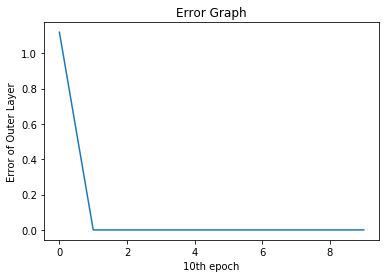

In [9]:
plt.plot(errors)
plt.xlabel('10th epoch')
plt.ylabel('Error of Outer Layer')
plt.title('Error Graph')
plt.show()